### Clastering

In [11]:
import re
import random
import spacy
import numpy as np
import itertools
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Load data

In [2]:
path = "functions.txt"
with open(path, "r") as f:
    funcs = list(map(str.strip, f.readlines()))

def printk(funcs, k=10, show_sort=True, nmap=None, rand=False):
    print(f"#funcs={len(funcs)}")
    print("funcs:")
    if rand:
        indices = [random.randint(0, len(funcs) - 1) for i in range(k)]
    else:
        indices = range(k)
    for i in indices:
        if nmap:
            print(funcs[i], nmap[funcs[i]])
        else:
            print(funcs[i])
    
    if show_sort:
        print("\nsorted:")
        for i, f in enumerate(sorted(funcs)):
            if nmap:
                print(f, nmap[f])
            else:
                print(f)
            if i == k:
                break
printk(funcs)

#funcs=95793
funcs:
bobsleigh_rc_track_left_half_banked_helix_up_small
removeDuplicates
error_init_writer
grpc_call_set_completion_queue
start_read_op
matrix_add_const
freeResultList
BIO_get_port
CustomPromiseHook
i2d_ASN1_UTF8STRING

sorted:
$DESCRIPTOR
A
A1B1
A1m1f
A2WHelper
A2m1f
A3coeff
A3f
ABRThandler
ABSL_DECLARE_FLAG
ABSL_FLAG


Drop wrong names

In [3]:
re_ident = re.compile(rf"^[a-zA-Z_][a-zA-Z_0-9]*$", re.UNICODE)
funcs = [f for f in funcs if re_ident.fullmatch(f)]
printk(funcs)

#funcs=95751
funcs:
bobsleigh_rc_track_left_half_banked_helix_up_small
removeDuplicates
error_init_writer
grpc_call_set_completion_queue
start_read_op
matrix_add_const
freeResultList
BIO_get_port
CustomPromiseHook
i2d_ASN1_UTF8STRING

sorted:
A
A1B1
A1m1f
A2WHelper
A2m1f
A3coeff
A3f
ABRThandler
ABSL_DECLARE_FLAG
ABSL_FLAG
ABSL_RETIRED_FLAG


Split names to tokens

In [4]:
oneword = re.compile(r"^[a-z][a-z0-9]+|[A-Z][A-Z0-9]$")
difCase = re.compile(r".+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)")
under_scores_split = re.compile(r"_")

def tokenize_funcs(funcs):
    tokenized_funcs = []
    for f in funcs:
        if oneword.fullmatch(f):
            tokenized_funcs.append([f])
        elif "_" in f:
            tokenized_funcs.append([w for w in under_scores_split.split(f) if w])
        else:
            tokenized_funcs.append([w.group(0) for w in difCase.finditer(f) if w.group(0)])
    return tokenized_funcs

tokenized_funcs = tokenize_funcs(funcs)
name2tokens = {f: tokenized_funcs[i] for i, f in enumerate(funcs)}
printk(funcs, nmap=name2tokens, rand=True)
del name2tokens

#funcs=95751
funcs:
CBS_get_u32 ['CBS', 'get', 'u32']
test_3_arg_mutable_buffer_read_at ['test', '3', 'arg', 'mutable', 'buffer', 'read', 'at']
path_append_extension ['path', 'append', 'extension']
sk_CONF_MODULE_find_ex ['sk', 'CONF', 'MODULE', 'find', 'ex']
sk_SRP_user_pwd_pop_free ['sk', 'SRP', 'user', 'pwd', 'pop', 'free']
vpx_idct16x16_256_add_half1d ['vpx', 'idct16x16', '256', 'add', 'half1d']
__fstream_printf_notsup ['fstream', 'printf', 'notsup']
large_prof_alloc_time_set ['large', 'prof', 'alloc', 'time', 'set']
_OesClientMain_CancelOrder ['OesClientMain', 'CancelOrder']
b3OutputPrintfVarArgsInternal ['b3Output', 'Printf', 'Var', 'Args', 'Internal']

sorted:
A ['A']
A1B1 ['A1B1']
A1m1f ['A1m1f']
A2WHelper ['A2W', 'Helper']
A2m1f ['A2m1f']
A3coeff ['A3coeff']
A3f ['A3f']
ABRThandler ['ABR', 'Thandler']
ABSL_DECLARE_FLAG ['ABSL', 'DECLARE', 'FLAG']
ABSL_FLAG ['ABSL', 'FLAG']
ABSL_RETIRED_FLAG ['ABSL', 'RETIRED', 'FLAG']


Drop digits and underscores from tokens, convert to low register

In [5]:
wrong_char = re.compile(r"[0-9_]")
for i, tokenized_func in enumerate(tokenized_funcs):
    tokenized_funcs[i] = [re.sub(wrong_char, "", token).lower() for token in tokenized_func if re.sub(wrong_char, "", token)]
name2tokens = {f: tokenized_funcs[i] for i, f in enumerate(funcs)}
for i, tokenized_func in enumerate(tokenized_funcs):
    if not len(tokenized_func):
        del funcs[i], tokenized_funcs[i]
printk(funcs, nmap=name2tokens, rand=True)
del name2tokens

#funcs=95751
funcs:
timelib_conv_int64_unsigned ['timelib', 'conv', 'int', 'unsigned']
keyForInboxCacheByFeedPrefix ['key', 'for', 'inbox', 'cache', 'by', 'feed', 'prefix']
tre_mem_destroy ['tre', 'mem', 'destroy']
__sync_dup_walk ['sync', 'dup', 'walk']
FreeMicroFeatures ['free', 'micro', 'features']
AddToNormProtosList ['add', 'to', 'norm', 'protos', 'list']
jas_icctxtdesc_copy ['jas', 'icctxtdesc', 'copy']
reset_gen_latch ['reset', 'gen', 'latch']
pgd_annot_save_file_attachment_button_clicked ['pgd', 'annot', 'save', 'file', 'attachment', 'button', 'clicked']
update_skip_probs ['update', 'skip', 'probs']

sorted:
A ['a']
A1B1 ['ab']
A1m1f ['amf']
A2WHelper ['aw', 'helper']
A2m1f ['amf']
A3coeff ['acoeff']
A3f ['af']
ABRThandler ['abr', 'thandler']
ABSL_DECLARE_FLAG ['absl', 'declare', 'flag']
ABSL_FLAG ['absl', 'flag']
ABSL_RETIRED_FLAG ['absl', 'retired', 'flag']


Lemmatize tokens

In [6]:
nlp = spacy.load("en", disable=["parser", "ner"])
lengths = np.cumsum([0] + list(map(len, tokenized_funcs)))
flat_tokens = [tok for func_tokens in tokenized_funcs for tok in func_tokens]
doc = spacy.tokens.Doc(nlp.vocab, words=flat_tokens)
for i in range(1, len(lengths)):
    span = doc[lengths[i - 1]: lengths[i]]
    tokenized_funcs[i - 1] = [token.lemma_ for token in span]
        
name2tokens = {f: tokenized_funcs[i] for i, f in enumerate(funcs)}
printk(funcs, nmap=name2tokens, rand=True)
del name2tokens, nlp, lengths, flat_tokens, doc

#funcs=95751
funcs:
fpp_skipws ['fpp', 'skipws']
title_sequence_change_preset ['title', 'sequence', 'change', 'preset']
new_map_handlerdata ['new', 'map', 'handlerdata']
print_test_data ['print', 'test', 'datum']
b2GetPointStates ['bget', 'point', 'state']
read_frame_size ['read', 'frame', 'size']
codecIdByFourCC ['codec', 'id', 'by', 'four', 'cc']
IMPLEMENT_ssl23_meth_func ['implement', 'ssl', 'meth', 'func']
bs_stats ['b', 'stats']
RIFSIGNALED ['rifsignaled']

sorted:
A ['a']
A1B1 ['ab']
A1m1f ['amf']
A2WHelper ['aw', 'helper']
A2m1f ['amf']
A3coeff ['acoeff']
A3f ['af']
ABRThandler ['abr', 'thandler']
ABSL_DECLARE_FLAG ['absl', 'declare', 'flag']
ABSL_FLAG ['absl', 'flag']
ABSL_RETIRED_FLAG ['absl', 'retire', 'flag']


Construct vocabulary

get 5285
test 4575
mm 3808
to 3249
set 3231
track 3047
rc 2445
init 2105
deg 1975
epi 1952

reversed dict
initmaskingdec 1
rrot 1
changelevel 1
policyof 1
skipqname 1
logprintenabled 1
loggable 1
lsfpoly 1
regenerate 1
retrtype 1


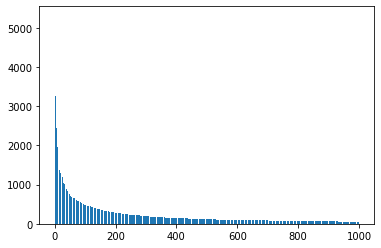

In [7]:
word2freq = collections.defaultdict(int)
for func_tokens in tokenized_funcs:
    for tok in func_tokens:
        word2freq[tok] += 1
word2freq = {k: v for k, v in sorted(word2freq.items(), key=lambda item: item[1], reverse=True)}
for i, (k, v) in zip(range(10), word2freq.items()):
    print(k, v)
print("\nreversed dict")
vocab_low_to_high = {k: v for k, v in sorted(word2freq.items(), key=lambda item: item[1], reverse=False)}
for i, (k, v) in zip(range(10), vocab_low_to_high.items()):
    print(k, v)
    
word2ind = {w: i for w, i in zip(word2freq.keys(), itertools.count())}
ind2freq = {word2ind[w]: freq for (w, freq), _ in zip(word2freq.items(), range(1000))}
plt.bar(ind2freq.keys(), ind2freq.values())
plt.show()
del vocab_low_to_high

Construct feature matrix

In [8]:
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, sublinear_tf=True)    
tfidf = tfidf.fit_transform(tokenized_funcs)
print(tfidf.shape)
print(tfidf)

(95751, 21194)
  (0, 16470)	0.3879117978357147
  (0, 19074)	0.2809947806593856
  (0, 7999)	0.3875662371089976
  (0, 1051)	0.28289271613607303
  (0, 7853)	0.37616833860172444
  (0, 9753)	0.28883445346230635
  (0, 18437)	0.23132226996076244
  (0, 13918)	0.24273125063736098
  (0, 1423)	0.4505264479066093
  (1, 4732)	0.8325746683466194
  (1, 14389)	0.5539128285457169
  (2, 20332)	0.72256342708919
  (2, 8597)	0.4337002597294879
  (2, 5244)	0.5383364919301863
  (3, 13771)	0.49284247896126465
  (3, 2689)	0.5891984085685297
  (3, 15455)	0.2996743902557393
  (3, 1805)	0.432191229331845
  (3, 7770)	0.3651814992371696
  (4, 12248)	0.6198219473421002
  (4, 13977)	0.5045180319917368
  (4, 17041)	0.6010676409425411
  (5, 2843)	0.6403835811751956
  (5, 136)	0.4162653936485429
  (5, 10530)	0.6454703641623336
  :	:
  (95744, 11521)	0.3570582874716897
  (95744, 12073)	0.44888335986466
  (95745, 16383)	0.3715135663778531
  (95745, 3991)	0.4725261441261112
  (95745, 17283)	0.40455929193951634
  (95745, 13

Clustering

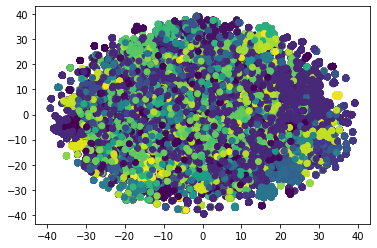

In [14]:
n_clusters=100
model = KMeans(n_clusters=n_clusters)
predictions = model.fit_predict(tfidf)
tsne = TSNE(learning_rate=100)
transformed = tsne.fit_transform(tfidf)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis, c=predictions)
plt.show()
del transformed, x_axis, y_axis

In [39]:
centers = np.array(model.cluster_centers_)
closest_ct = 10
for i in range(n_clusters):
    center = centers[i]
    cluster_indexes = [j for j, cl in enumerate(predictions) if cl == i]
    cluster_tfidf = tfidf[cluster_indexes, :]
    cluster_funcs = [funcs[j] for j in cluster_indexes]
    cluster_tfidf -= center
    cluster_tfidf = np.square(cluster_tfidf)
    cluster_tfidf = cluster_tfidf.sum(1)
    cluster_tfidf = np.asarray(np.sqrt(cluster_tfidf)).reshape(-1)
    cluster_indexes = np.argpartition(cluster_tfidf, closest_ct)
    print(f"cluster{i + 1}")
    for j in range(closest_ct):
        print(cluster_funcs[cluster_indexes[j]])
    print("")

cluster1
ZSTD_hash8
ZSTD_hash4
ZSTD_hash3
ZSTD_hash5
list_alloc
ZSTD_hash6
call_r_r
sqlite3_str_reset
ZSTD_hash7
generate_call

cluster2
PKCS7_free
PKCS7_Init
PKCS7_new
PKCS12_new
PKCS12_SAFEBAG_get0_pkcs8
pkcs7_new
PKCS12_init
PKCS12_free
PKCS12_SAFEBAG_create0_pkcs8
sk_PKCS7_set

cluster3
f253
f18
f252
f205
f141
f204
f42
f21
f142
f119

cluster4
init42
init3
init512
init41
init
init0
init256
Init
init224
init384

cluster5
inverted_rc_track_flat_to_left_bank
inverted_rc_track_diag_left_bank_to_flat
inverted_rc_track_left_bank_to_flat
inverted_rc_track_left_bank
inverted_rc_track_right_bank_to_flat
inverted_rc_track_flat_to_right_bank
inverted_rc_track_right_bank
inverted_rc_track_diag_flat_to_left_bank
inverted_rc_track_diag_flat_to_right_bank
inverted_rc_track_diag_right_bank_to_flat

cluster6
New
SSL_new
X509_new
string_new
test_new
ssl3_new
x509_new
new
ssl_new
sk_X509_new

cluster7
m_get
is_string
isSet
isString
_is_type
IsString
is32
is_key
isFile
is_block

cluster8
op_create
op_f

cluster57
check_3
check64
check_6
check32
check_2
check_5
Check
check128
check_1
check

cluster58
_is_number
IsNumber
isNumber
get_number
to_number
InitNumber
number
Number
add_number
ParseNumber

cluster59
add_reference_test_4
reference
test_reference
add_reference_test_9
add_reference_test_3
add_reference_test_12
add_reference_test_10
add_reference_test_13
add_reference_test_11
add_reference_test_5

cluster60
bn_free
BN_new
BN_add
BN_init
BN_free
bn_new
bn_print
BN_print
BN_sub
BN_copy

cluster61
GetTestState
state_free
state_create
InitState
SSL_state
state
init_state
free_state
_state
getState

cluster62
processed_name
is_process
processFrame
process_frame_
process_frame
ProcessFile
process
ProcessFiles
process_file
processFile

cluster63
aws_byte_buf_write
aws_byte_cursor_eq_byte_buf
aws_byte_cursor_read_and_fill_buffer
aws_byte_buf_init
aws_byte_cursor_read
aws_byte_buf_eq
aws_byte_buf_write_be16
aws_byte_buf_write_be64
aws_byte_buf_write_be32
aws_byte_buf_write_be24

cluster64
v